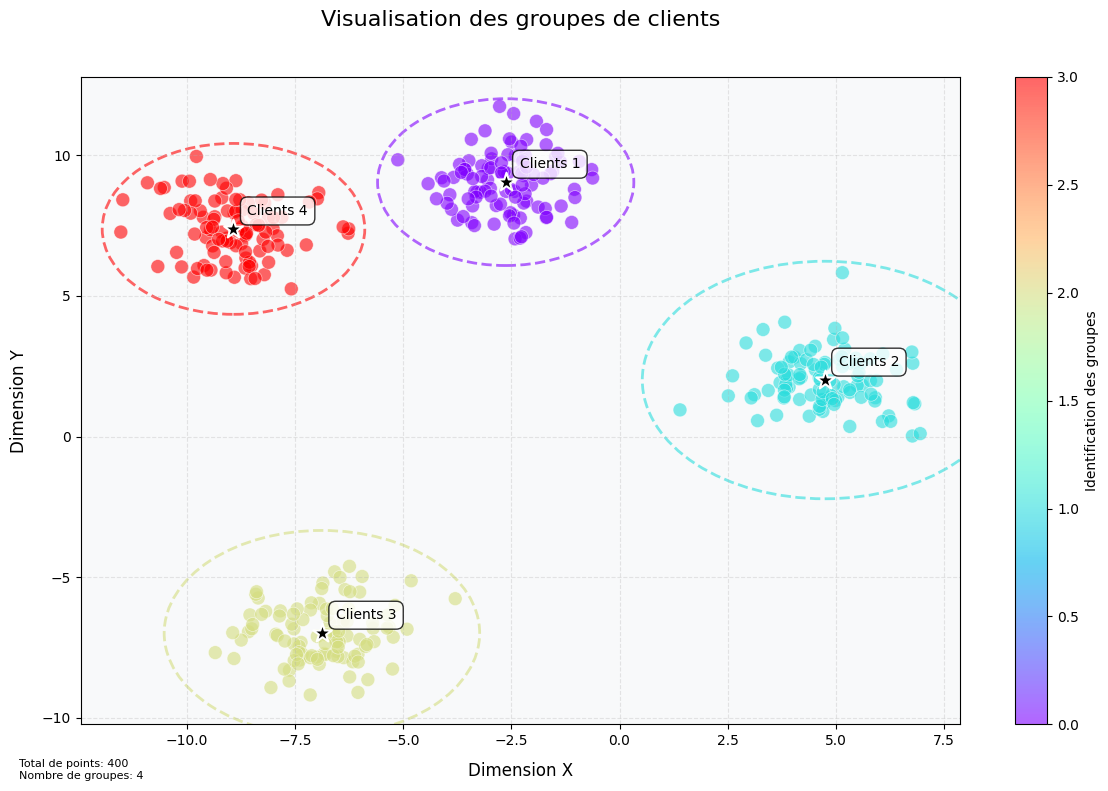

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from scipy.spatial import ConvexHull

def plot_beautiful_clusters(n_clusters=3, n_samples=300, random_state=42):
    # Configuration précédente inchangée jusqu'au scatter plot
    sns.set_palette("husl")
    X, y = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.0, random_state=random_state)
    plt.figure(figsize=(12, 8), dpi=100)
    plt.gca().set_facecolor('#f8f9fa')
    plt.gcf().set_facecolor('#ffffff')
    
    # Obtenir les couleurs de la colormap pour les réutiliser
    cmap = plt.cm.rainbow
    colors = cmap(np.linspace(0, 1, n_clusters))
    
    # Tracer les points
    scatter = plt.scatter(
        X[:, 0], X[:, 1],
        c=y,
        cmap='rainbow',
        s=100,
        alpha=0.6,
        edgecolors='white',
        linewidth=0.5
    )
    
    # Calculer et tracer les centres
    centers = np.array([X[y == i].mean(axis=0) for i in range(n_clusters)])
    plt.scatter(
        centers[:, 0], centers[:, 1],
        c='black',
        s=200,
        marker='*',
        label='Centres des clusters',
        linewidth=1.5,
        edgecolors='white'
    )
    
    # Ajouter les cercles englobants pour chaque cluster
    for i in range(n_clusters):
        cluster_points = X[y == i]
        
        # Calculer le centre et le rayon du cercle englobant
        center = centers[i]
        # Calculer le rayon comme la distance maximale du centre à tout point du cluster
        radius = np.max(np.sqrt(np.sum((cluster_points - center) ** 2, axis=1))) * 1.1  # 1.1 pour avoir une marge
        
        # Tracer le cercle
        circle = plt.Circle(
            center,
            radius,
            fill=False,
            linestyle='--',
            linewidth=2,
            color=colors[i],
            alpha=0.6
        )
        plt.gca().add_artist(circle)
    
    # Reste du code inchangé
    for i in range(n_clusters):
        plt.annotate(
            f'Clients {i+1}',
            (centers[i, 0], centers[i, 1]),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
            fontsize=10
        )
    
    plt.title('Visualisation des groupes de clients\n', fontsize=16, pad=20)
    plt.xlabel('Dimension X', fontsize=12, labelpad=10)
    plt.ylabel('Dimension Y', fontsize=12, labelpad=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    legend = plt.colorbar(scatter)
    legend.set_label('Identification des groupes', fontsize=10)
    
    plt.figtext(
        0.02, 0.02,
        f'Total de points: {n_samples}\nNombre de groupes: {n_clusters}',
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_beautiful_clusters(n_clusters=4, n_samples=400)